# Домашнее задание #3

<pre>
ФИО: Никифоров Владимир
</pre>

1. Разделить дата сет на трейн и тест в отношение 50:50 70:30 80:20 (с перемешиванием)
2. Обучать наши модели на трейне. Предсказывать и замерять метрику R^2 и на трейне и на тесте
3. Проверить следующие модели, для каждого разделения:
    а) sales ~ log_tv + radio
    б) sales ~ TV + radio
    в) sales ~ TV + radio + newspaper

In [1]:
# Common imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from sklearn.linear_model import LinearRegression
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
import os
import urllib
import shutil

def download_file(url, dir_path="data"):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        
    file_name = os.path.split(url)[-1]
    file_path = os.path.join(dir_path, file_name)
    
    with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
        
    return file_path

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
download_file("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv")
adv_df = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
adv_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
adv_df.shape

(200, 4)

#### preprocessing

In [6]:
adv_df['log_tv'] = adv_df.TV.apply(lambda x: math.pow(x, 0.4))

In [7]:
def split_df(df, p_test_size=0.5):
    '''
    Splitting DataFrame by percentage of test
    '''
    adv_train, adv_test = train_test_split(df, test_size=p_test_size, random_state=7, shuffle=True)
    print("=============================================================")
    print("Splitting by: ", str(100-p_test_size*100)+'%')
    print("Total transactions in train dataset: ", len(adv_train))
    print("Total transactions in test dataset: ", len(adv_test))
    return adv_train, adv_test

def score_model(p_fields, df_train, df_test):
    '''
    Create model by formula, fit and score
    '''
    '''
    lm = LinearRegression()
    model = lm.fit(x_train, y_train)
    print('R^2 score for test:', model.score(x_test, y_test))
    print('R^2 score for train:', model.score(x_train, y_train))
    '''
    formula = f"sales ~ {' + '.join(p_fields)}"
    three_x_lm = smf.ols(formula, df_train).fit()
    y_pred_test = three_x_lm.predict(df_test[p_fields])
    y_test = df_test['sales']
    R_2_test2 = sklearn.metrics.r2_score(y_test, y_pred_test)

    print(f"model=[{'sales ~ ' + ' + '.join(p_fields)}]: Train R^2 = {three_x_lm.rsquared}")
    print(f"model=[{'sales ~ ' + ' + '.join(p_fields)}]: Test R^2 = {R_2_test2}")
    return (three_x_lm.rsquared, R_2_test2)

In [8]:
l_res = []
for x in [0.5,0.3,0.2]:
    l_row={}
    l_row['split_perc'] = x
    adv_train, adv_test = split_df(df=adv_df, p_test_size=x)
    l_row['log_tv + radio'] = score_model(['log_tv','radio'], adv_train, adv_test)
    l_row['TV + radio'] = score_model(['TV','radio'], adv_train, adv_test)
    l_row['TV + radio + newspaper'] = score_model(['TV','radio','newspaper'], adv_train, adv_test)
    l_res.append(l_row)

Splitting by:  50.0%
Total transactions in train dataset:  100
Total transactions in test dataset:  100
model=[sales ~ log_tv + radio]: Train R^2 = 0.9365398357049122
model=[sales ~ log_tv + radio]: Test R^2 = 0.9153956674965311
model=[sales ~ TV + radio]: Train R^2 = 0.8970895355114129
model=[sales ~ TV + radio]: Test R^2 = 0.8919937852058214
model=[sales ~ TV + radio + newspaper]: Train R^2 = 0.8971789551990025
model=[sales ~ TV + radio + newspaper]: Test R^2 = 0.8915506500621206
Splitting by:  70.0%
Total transactions in train dataset:  140
Total transactions in test dataset:  60
model=[sales ~ log_tv + radio]: Train R^2 = 0.9296030769766779
model=[sales ~ log_tv + radio]: Test R^2 = 0.9279408976069347
model=[sales ~ TV + radio]: Train R^2 = 0.8970470374578727
model=[sales ~ TV + radio]: Test R^2 = 0.8894561428492667
model=[sales ~ TV + radio + newspaper]: Train R^2 = 0.8970470429900155
model=[sales ~ TV + radio + newspaper]: Test R^2 = 0.8894586465158203
Splitting by:  80.0%
Total 

In [9]:
l_res

[{'split_perc': 0.5,
  'log_tv + radio': (0.9365398357049122, 0.9153956674965311),
  'TV + radio': (0.8970895355114129, 0.8919937852058214),
  'TV + radio + newspaper': (0.8971789551990025, 0.8915506500621206)},
 {'split_perc': 0.3,
  'log_tv + radio': (0.9296030769766779, 0.9279408976069347),
  'TV + radio': (0.8970470374578727, 0.8894561428492667),
  'TV + radio + newspaper': (0.8970470429900155, 0.8894586465158203)},
 {'split_perc': 0.2,
  'log_tv + radio': (0.9295723324315831, 0.9331248172508639),
  'TV + radio': (0.8928993103144962, 0.9095363908842858),
  'TV + radio + newspaper': (0.8929164670647455, 0.9095550600904052)}]

In [10]:
df_res_train = pd.DataFrame({'split_percent': [0.5, 0.7, 0.8], 
                             'log_tv + radio': [x['log_tv + radio'][0] for x in l_res],
                             'TV + radio': [x['TV + radio'][0] for x in l_res],
                             'TV + radio + newspaper': [x['TV + radio + newspaper'][0] for x in l_res]})
df_res_test = pd.DataFrame({'split_percent': [0.5, 0.7, 0.8],
                            'log_tv + radio': [x['log_tv + radio'][1] for x in l_res],
                            'TV + radio': [x['TV + radio'][1] for x in l_res],
                            'TV + radio + newspaper': [x['TV + radio + newspaper'][1] for x in l_res]})

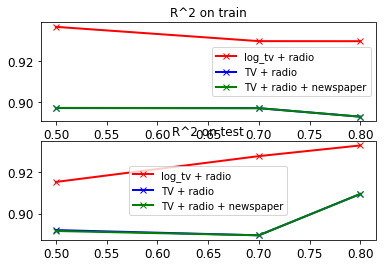

In [11]:
plt.subplot(2, 1, 1)
plt.title('R^2 on train')
plt.plot( 'split_percent', 'log_tv + radio', data=df_res_train, marker='x', color='red', linewidth=2)
plt.plot( 'split_percent', 'TV + radio', data=df_res_train, marker='x', color='blue', linewidth=2)
plt.plot( 'split_percent', 'TV + radio + newspaper', data=df_res_train, marker='x', color='green', linewidth=2)
plt.legend()
plt.subplot(2, 1, 2)
plt.title('R^2 on test')
plt.plot( 'split_percent', 'log_tv + radio', data=df_res_test, marker='x', color='red', linewidth=2)
plt.plot( 'split_percent', 'TV + radio', data=df_res_test, marker='x', color='blue', linewidth=2)
plt.plot( 'split_percent', 'TV + radio + newspaper', data=df_res_test, marker='x', color='green', linewidth=2)
plt.legend();